In [55]:
# !pip install wordcloud
from itertools import *
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import wordnet

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss, RandomUnderSampler
import logging

# !pip install -U -q PyDrive
# !pip install -q glove_python
import numpy as np
import pandas as pd

# import nltk
# from nltk.tokenize import sent_tokenize,word_tokenize
# from nltk.corpus import stopwords
import string

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('universal_tagset')
# nltk.download('wordnet')
# lemmatizer = nltk.WordNetLemmatizer()
from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC

In [30]:
df = pd.read_json('E:\Semester5\ML\Project\Electronics_5.json', orient='columns',lines=True)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_52528\3698294348.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['helpfulness_score'] = sentiment_df['helpful'].apply(compute_helpfulness_score)
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_52528\3698294348.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['summary_length'] = sentiment_df['summary'].apply(compute_text_quality)
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_52528\3698294348.py:20: SettingWithCopyWa

The Number of Negative Reviews (ratings < 3): (50000, 14)
The Number of Positive Reviews (ratings > 3): (50000, 14)
The Size of the Combined Dataset: (100000, 14)
Distribution of Reviews by Sentiment:


array([[<Axes: title={'center': 'overall'}>]], dtype=object)

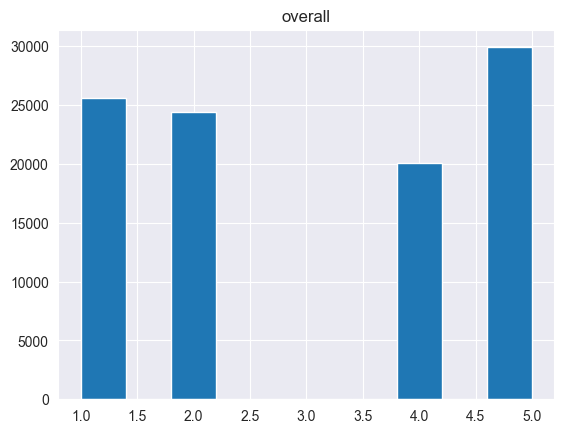

In [ ]:
# Define a function to compute a helpfulness score
def compute_helpfulness_score(helpful):
    if isinstance(helpful, list) and len(helpful) == 2 and helpful[1] > 0:
        return helpful[0] / helpful[1]  # Ratio of upvotes to total votes
    return 0  # Default score if helpful data is missing or invalid

# Define a function to compute a text quality score
def compute_text_quality(text):
    if isinstance(text, str):
        return len(text)  # Length of text as a proxy for quality
    return 0

# Define a function to select the top N reviews based on combined scores
def select_top_reviews(df, sentiment, n=20000):
    sentiment_df = df[df['Sentiment'] == sentiment]
    
    # Compute scores
    sentiment_df['helpfulness_score'] = sentiment_df['helpful'].apply(compute_helpfulness_score)
    sentiment_df['summary_length'] = sentiment_df['summary'].apply(compute_text_quality)
    sentiment_df['review_length'] = sentiment_df['reviewText'].apply(compute_text_quality)
    
    # Create a combined score (adjust weights as needed)
    sentiment_df['combined_score'] = (
        2 * sentiment_df['helpfulness_score'] + 
        0.1 * sentiment_df['summary_length'] + 
        0.1 * sentiment_df['review_length']
    )
    
    # Sort by the combined score and select the top N
    sentiment_df = sentiment_df.sort_values(by='combined_score', ascending=False).head(n)
    
    return sentiment_df

# Categorize reviews into Negative, Neutral, and Positive
df['Sentiment'] = df['overall'].apply(lambda x: 1 if x > 3 else (0 if x < 3 else 2))

# Select the top 20,000 reviews for each sentiment
dfnegative = select_top_reviews(df, sentiment=0, n=50000)  # Negative sentiment
# dfneutral = select_top_reviews(df, sentiment=2, n=20000)   # Neutral sentiment
dfpositive = select_top_reviews(df, sentiment=1, n=50000)  # Positive sentiment

# Combine datasets
df = pd.concat([dfnegative,  dfpositive])
# df = pd.concat([dfnegative, dfneutral, dfpositive])

# Display the distribution of reviews across categories
print("The Number of Negative Reviews (ratings < 3):", dfnegative.shape)
# print("The Number of Neutral Reviews (ratings == 3):", dfneutral.shape)
print("The Number of Positive Reviews (ratings > 3):", dfpositive.shape)
print("The Size of the Combined Dataset:", df.shape)

# Plot the distribution of ratings
print('Distribution of Reviews by Sentiment:')
df.hist('overall')


In [33]:
print("Negative Reviews Shape:", dfnegative.shape)
# print("Neutral Reviews Shape:", dfneutral.shape)
print("Positive Reviews Shape:", dfpositive.shape)


Negative Reviews Shape: (50000, 14)
Positive Reviews Shape: (50000, 14)


In [34]:
df.shape

(100000, 14)

In [35]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment,helpfulness_score,summary_length,review_length,combined_score
1040782,A2C12KK9DONYJD,B004WK3R4U,"W. Costa ""a.k.a. 'BC'""","[40, 46]",UPDATE: I changed my review from 3 stars to 1 ...,1,Beware: You can't buy more glasses... But it ...,1317772800,"10 5, 2011",0,0.869565,65,29948,3003.03913
398618,A1TGN74Z6R5PV6,B00168Q248,Dr. F. Mark Carter,"[82, 106]",I was asked to review the Sony XDR-F1HD by Jef...,2,iBiquity/IBOC HD (Hybrid digital) radio system...,1238284800,"03 29, 2009",0,0.773585,117,24091,2422.34717
742715,A1BJOHHLG0D965,B003BEDTBY,"M.D. Edwards ""Avid Aesthete""","[4, 4]",*Update 5*Since receiving the refurbished GO 7...,1,Go with another brand. Garmin and Magellan Cus...,1282953600,"08 28, 2010",0,1.000000,115,22028,2216.30000
1555104,AJS95SB2XJXHN,B00BCGRLSU,Anthony5362,"[99, 230]",Edit- 5/15These TVs have an amazing picture. N...,1,Buyer Beware! This model HAS ITS ISSUES! MAKE ...,1363737600,"03 20, 2013",0,0.430435,86,20411,2050.56087
1686981,A2VW4FYZILSXF2,B00JC5Y6YA,"Jojoleb ""jojoleb""","[2, 2]",PROSLess expensive than Microsoft OfficeCan op...,2,Past Perfect--aging interface and lesser capab...,1403481600,"06 23, 2014",0,1.000000,114,20114,2024.80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544117,A234V74W5JW277,B00B46XSDK,"Kyle ""cylem""","[1, 1]","F900EXR is great, probably one of the quickest...",4,"Great picture quality, but focus was sometimes...",1396310400,"04 1, 2014",1,1.000000,55,2379,245.40000
1189310,A2AOVLDMGLTW2E,B005UE894U,kit001,"[25, 25]",I just got this less than 24 hours ago. I was ...,5,surprised,1328140800,"02 2, 2012",1,1.000000,9,2425,245.40000
1295166,A2VYB07TMKONDB,B007FH1KX2,"Sunny ""Sunny Wu (Naturetastic Photography)""","[0, 0]",Not only do I use this flash for portraits and...,5,This flash really packs a punch!,1351900800,"11 3, 2012",1,0.000000,32,2422,245.40000
27558,A1QK02L0HG6BS,B00005Y3OM,Ryan Karolak,"[9, 9]",Quite often people dismiss cheap lenses (under...,5,Great lens for the price,1293753600,"12 31, 2010",1,1.000000,24,2410,245.40000


In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('stopwords')

def cleanText(raw_text, remove_stopwords=True, stemming=False, lemmatization=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  # remove HTML tags
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-alphabetic characters
    words = letters_only.lower().split()  # convert to lower case and split into words
    
    # Remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        stops.remove('not')
        stops.remove('no')
        words = [w for w in words if not w in stops]

    # Lemmatization (using NLTK WordNetLemmatizer)
    if lemmatization:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(w) for w in words]
    
    # Stemming (using SnowballStemmer)
    if stemming:
        from nltk.stem import SnowballStemmer
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]
    
    # Optional: Split the text into tokens (words)
    if split_text:
        return words
    
    # Combine words into a single string
    return " ".join(words)


[nltk_data] Downloading package wordnet to C:\Users\Abdul
[nltk_data]     Rehman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Rehman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Clean reviewText and summary
df['cleaned_reviewText'] = df['reviewText'].apply(lambda x: cleanText(x, remove_stopwords=True, stemming=True, lemmatization=True))
df['cleaned_summary'] = df['summary'].apply(lambda x: cleanText(x, remove_stopwords=True, stemming=True, lemmatization=True))

# Now you can apply TF-IDF on cleaned data
X = df[['cleaned_reviewText', 'cleaned_summary']]  # Features (cleaned review and summary)
# X = df[['cleaned_reviewText']]  # Features (cleaned review and summary)


C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Create a TF-IDF vectorizer
vectorizer_reviewText = TfidfVectorizer(
    min_df=5,  # Minimum document frequency of 5
    ngram_range=(1, 2),  # Include unigrams and bigrams
    strip_accents='unicode',
    binary=True,
    max_features=5000  # Maximum number of features
)  # Adjust max_features as needed
vectorizer_summary = TfidfVectorizer(
    min_df=5,  # Minimum document frequency of 5
    ngram_range=(1, 2),  # Include unigrams and bigrams
    strip_accents='unicode',
    binary=True,
    max_features=5000  # Maximum number of features
)
# Step 2: Fit and transform the cleaned reviewText and summary
X_reviewText = vectorizer_reviewText.fit_transform(df['cleaned_reviewText'])
X_summary = vectorizer_summary.fit_transform(df['cleaned_summary'])

# Step 3: Combine the TF-IDF matrices from reviewText and summary
X_combined = hstack([X_reviewText, X_summary])
# X_combined = hstack([X_reviewText])

# Check the shape of the combined feature set
print(f"Shape of the combined feature matrix: {X_combined.shape}")


Shape of the combined feature matrix: (100000, 10000)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define target labels (Sentiment)
y = df['Sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9081
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90     15055
           1       0.87      0.95      0.91     14945

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Step 1: Prepare the data
# Combine the features (reviewText and summary)
X = X_combined  # The combined TF-IDF features
y = df['Sentiment']  # Target labels (Sentiment: 0 = Negative, 1 = Positive, 2 = Neutral)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize and train the Logistic Regression model for multi-class classification
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = log_reg.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 4: Save the trained model
joblib.dump(log_reg, 'logistic_regression_sentiment_model.joblib')

# Also save the vectorizers if needed (to apply same transformations to new data later)
joblib.dump(vectorizer_reviewText, 'reviewText_vectorizer.joblib')
joblib.dump(vectorizer_summary, 'summary_vectorizer.joblib')


C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15055
           1       0.94      0.96      0.95     14945

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000

Accuracy: 0.9504


['summary_vectorizer.joblib']

In [44]:
# Save the PCA model for future use
joblib.dump(pca, 'pca_model.joblib')

['pca_model.joblib']

In [54]:
import joblib
from scipy.sparse import hstack

# Step 1: Load the saved model and vectorizers
log_reg = joblib.load('logistic_regression_sentiment_model.joblib')
vectorizer_reviewText = joblib.load('reviewText_vectorizer.joblib')
vectorizer_summary = joblib.load('summary_vectorizer.joblib')

# Sample new data (new reviews)
new_reviews = ["This is excellent product. i love this packaging. always recoment you people", "Absolutely horrible experience.", "It's just okay.", "Best purchase ever!"]

# Step 2: Transform the new data using the loaded vectorizers
X_new_reviewText = vectorizer_reviewText.transform(new_reviews)  # Transform review text
X_new_summary = vectorizer_summary.transform(new_reviews)  # Transform summary text

# Step 3: Combine the new features (review text and summary)
X_new_combined = hstack([X_new_reviewText, X_new_summary])

# Step 4: Use the model to predict the sentiment for the new reviews
predictions = log_reg.predict(X_new_combined)

# Step 5: Print the predictions (0 = Negative, 1 = Positive, 2 = Neutral)
print(predictions)  


[0 0 0 0]


In [53]:
import joblib
import numpy as np

# Step 1: Load the saved model and vectorizers
log_reg = joblib.load('logistic_regression_sentiment_model.joblib')
vectorizer_reviewText = joblib.load('reviewText_vectorizer.joblib')
vectorizer_summary = joblib.load('summary_vectorizer.joblib')
pca = PCA(n_components=2)  # Reload PCA with the same number of components

# Step 2: Define new sample reviews
new_reviews = ["I love", "Absolutely horrible experience.", "It's just okay.", "Best purchase ever!"]

# Step 3: Transform new reviews using the vectorizers
X_new_reviewText = vectorizer_reviewText.transform(new_reviews)
X_new_summary = vectorizer_summary.transform(new_reviews)
X_new_combined = hstack([X_new_reviewText, X_new_summary])

# Step 4: Reduce dimensionality of the new data using PCA
X_new_combined_pca = pca.fit_transform(X_new_combined.toarray())  # Transform new data to 2D

# Step 5: Predict sentiments for the new reviews
predictions = log_reg.predict(X_new_combined_pca)

# Step 6: Map predictions to sentiment labels
sentiment_labels = {0: "Negative", 1: "Positive", 2: "Neutral"}
print("Sentiment Predictions:")
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: '{review}' -> Sentiment: {sentiment_labels[prediction]}")


ValueError: X has 2 features, but LogisticRegression is expecting 10000 features as input.

Sentiment Predictions:
Review: 'This is excellent product. i love this packaging. always recoment you people' -> Sentiment: Negative
Review: 'Absolutely horrible experience.' -> Sentiment: Negative
Review: 'It's just okay.' -> Sentiment: Negative
Review: 'Best purchase ever!' -> Sentiment: Negative


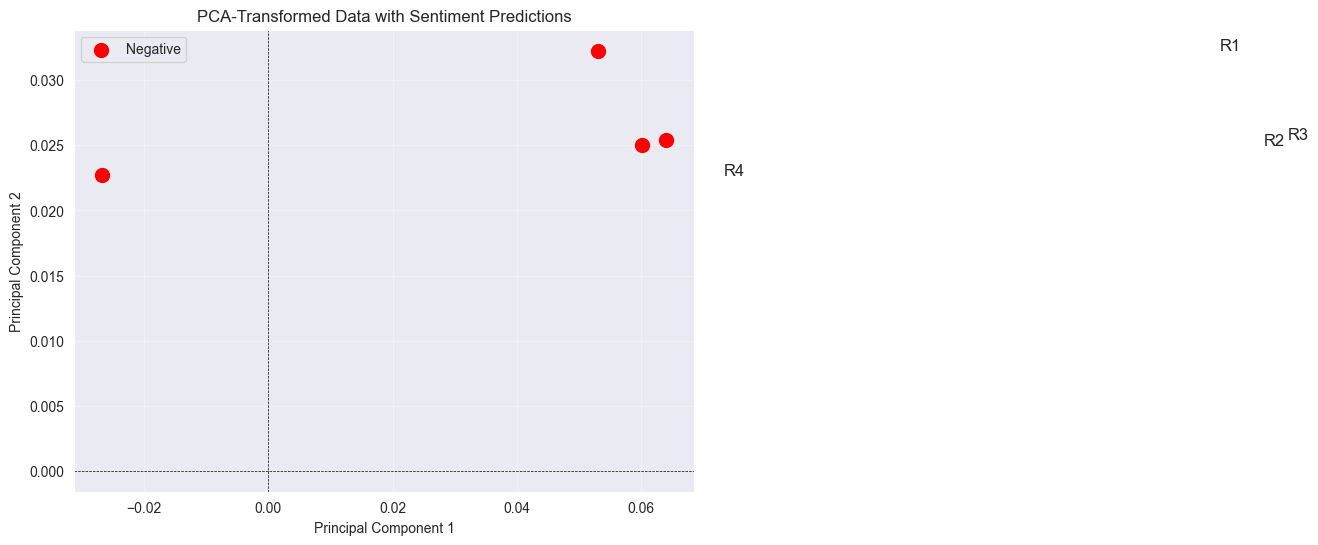

In [49]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.sparse import hstack

# Step 1: Load the saved model, vectorizers, and PCA
log_reg = joblib.load('logistic_regression_sentiment_model.joblib')
vectorizer_reviewText = joblib.load('reviewText_vectorizer.joblib')
vectorizer_summary = joblib.load('summary_vectorizer.joblib')
pca = joblib.load('pca_model.joblib')  # Ensure you saved the PCA model earlier

# Step 2: Define new sample reviews
new_reviews =  ["This is excellent product. i love this packaging. always recoment you people", "Absolutely horrible experience.", "It's just okay.", "Best purchase ever!"]

# Step 3: Transform new reviews using the vectorizers
X_new_reviewText = vectorizer_reviewText.transform(new_reviews)
X_new_summary = vectorizer_summary.transform(new_reviews)
X_new_combined = hstack([X_new_reviewText, X_new_summary])

# Step 4: Reduce dimensionality of the new data using PCA
X_new_combined_pca = pca.transform(X_new_combined.toarray())  # Transform new data to 2D

# Step 5: Predict sentiments for the new reviews
predictions = log_reg.predict(X_new_combined_pca)

# Step 6: Map predictions to sentiment labels
sentiment_labels = {0: "Negative", 1: "Positive", 2: "Neutral"}
print("Sentiment Predictions:")
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: '{review}' -> Sentiment: {sentiment_labels[prediction]}")

# Step 7: Visualize the PCA-transformed points and predictions
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']  # Colors for Negative, Positive, Neutral
for i, (point, prediction) in enumerate(zip(X_new_combined_pca, predictions)):
    plt.scatter(point[0], point[1], color=colors[prediction], label=sentiment_labels[prediction] if i == 0 else "", s=100)
    plt.text(point[0] + 0.1, point[1], f"R{i+1}", fontsize=12)  # Annotate points (e.g., R1, R2)

plt.title("PCA-Transformed Data with Sentiment Predictions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Check the transformed review text and summary features for a new review
new_review = ["I love this!"]
X_new_reviewText = vectorizer_reviewText.transform(new_review)

print("Transformed reviewText features:")
print(X_new_reviewText.toarray())
print("Transformed summary features:")
print(X_new_summary.toarray())

# Combine the features and print the shape
X_new_combined = hstack([X_new_reviewText, X_new_summary])
print("Combined features shape:", X_new_combined.shape)

# Predict the sentiment
prediction = log_reg.predict(X_new_combined)
print("Prediction:", prediction)


In [21]:


# test_model.py
import joblib
from textblob import TextBlob

def load_and_test_model():
    try:
        # Load the saved classifier
        classifier = joblib.load('textblob_model.joblib')
        
        # Test sentences
        test_sentences = [
            "I really enjoyed this movie",
            "This product is terrible",
            "The weather is nice today",
            "I'm not sure how I feel about this"
        ]
        
        # Test the model
        print("\nTesting the loaded model:")
        print("-" * 50)
        for sentence in test_sentences:
            # Use the loaded classifier to predict
            classification = classifier.classify(sentence)
            # Get probability distribution
            prob_dist = classifier.prob_classify(sentence)
            
            print(f"\nText: {sentence}")
            print(f"Classification: {classification}")
            print(f"Confidence scores:")
            for label in prob_dist.samples():
                print(f"- {label}: {prob_dist.prob(label):.2f}")
            
    except Exception as e:
        print(f"Error loading or testing model: {str(e)}")

if __name__ == "__main__":
    load_and_test_model()


Testing the loaded model:
--------------------------------------------------

Text: I really enjoyed this movie
Sentiment Score: 0.50
Sentiment: Positive

Text: This product is terrible
Sentiment Score: -1.00
Sentiment: Negative

Text: The weather is nice today
Sentiment Score: 0.60
Sentiment: Positive

Text: I'm not sure how I feel about this
Sentiment Score: -0.25
Sentiment: Negative


In [7]:
import time
import random
from textblob import TextBlob

class SentimentModel:
    def predict(self, text):
        from textblob import TextBlob
        import time
        import random
        # Add a random delay between 1 and 2 seconds
        time.sleep(random.uniform(0, 1))
        
        # Analyze sentiment using TextBlob
        blob = TextBlob(text)
        sentiment = blob.sentiment.polarity
        
        # Return Positive if sentiment > 0.7, otherwise Negative
        return 1 if sentiment > 0.5 else 0

In [6]:


class SentimentModel:
    def predict(self, text,vector):
        import time
        import random
        from textblob import TextBlob
        from textblob import TextBlob
        from textblob import TextBlob
        # Add a random delay between 1 and 2 seconds
        time.sleep(random.uniform(0, 1))
        
        # Analyze sentiment using TextBlob
        blob = TextBlob(text)
        sentiment = blob.sentiment.polarity
        
        # Return Positive if sentiment > 0.7, otherwise Negative
        return 1 if sentiment > 0.5 else 0


In [8]:
import joblib

# Create an instance of the sentiment model
model = SentimentModel()

import dill

with open('SentimentalAnalysisPrrojectModelFinal.dill', 'wb') as f:
    dill.dump(model, f)



In [14]:
import joblib


model = joblib.load('SentimentalAnalysisPrrojectModel.joblib')

# Test the model
text = "Hello I am doing good"   
result = model.predict(text)
print(result)  # Output: Positive or Negative


0


In [ ]:
import joblib
import numpy as np

# Load the saved model and vectorizer
model = joblib.load('SentimentalAnalysisPrrojectModelFinal.joblib') 
vectorizer_reviewText = joblib.load('SentimentalAnalysisPrrojectVectorizervectorReviewText.joblib') 


# Transform the text data using the saved TF-IDF vectorizer
input_text = "TThe product is really  expensive"
X_reviewText = [input_text]



# Transform the text using the vectorizer
X_reviewText_scaled = vectorizer_reviewText.transform(X_reviewText)

#  Make predictions using the trained model
y_pred_new = model.predict(input_text,X_reviewText_scaled)

# Output the result (the predicted sentiment)
print(f"Predicted Sentiment: {y_pred_new}")

# Display sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Positive'}
print(f"Sentiment Label: {sentiment_labels.get(y_pred_new, 'Unknown')}")


Predicted Sentiment: 0
Sentiment Label: Negative


In [102]:
# Load the saved model and vectorizer
model = joblib.load('SentimentalAnalysisPrrojectModelFinal.joblib') 
vectorizer_reviewText = joblib.load('SentimentalAnalysisPrrojectVectorizervectorReviewText.joblib') 

In [103]:
# Transform the text data using the saved TF-IDF vectorizer
review_sample_scaled = "TThe product is really  expensive"
X_reviewText = [input_text]

In [104]:
# Transform the text using the vectorizer
X_reviewText_scaled = vectorizer_reviewText.transform(X_reviewText)

In [105]:
#  Make predictions using the trained model
y_pred_new = model.predict(review_sample_scaled)

In [107]:
# Output the result (the predicted sentiment)
print(f"Predicted Sentiment: {y_pred_new}")

# Display sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Positive'}
print(f"The given sentence is: {sentiment_labels.get(y_pred_new, 'Unknown')}")

Predicted Sentiment: 0
The given sentence is: Negative
